In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import sys 
import os
from keras.preprocessing.image import ImageDataGenerator   
from keras.models import Sequential, Model, load_model  
from keras.layers import Conv2D, MaxPooling2D  
from keras.layers import Activation, Dropout, Flatten, Dense  
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  
from keras import regularizers  
import matplotlib.pyplot as plt
import random
import numpy as np
from keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

Using TensorFlow backend.


In [4]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False



train_data_dir = "C:/Users/Felipe/dataset-final/train"
validation_data_dir = "C:/Users/Felipe/dataset-final/val"

img_width, img_height = 224, 224  
epochs = 50
batch_size = 32
n_classes = 2
nb_train_samples = 7039
nb_validation_samples = 1508
lr = 0.000004

train_datagen = ImageDataGenerator(  
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    seed = 1)

validation_generator = test_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    seed = 1)


Found 7037 images belonging to 2 classes.
Found 1508 images belonging to 2 classes.


In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [5]:
model.compile(optimizer=optimizers.Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='.\logs\Inception2')
filepath="inception-50-2.h5"
mc = ModelCheckpoint(filepath,
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    period=5)
callbacks_list = [tensorboard,mc]

model_history2 = model.fit_generator(  
    train_generator,
    epochs=110,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks_list)

model.save('inception-50-2')

Epoch 1/110
219/219 [==============================] - 170s 777ms/step - loss: 0.4663 - acc: 0.8038 - val_loss: 0.3377 - val_acc: 0.8770
Epoch 2/110
219/219 [==============================] - 159s 724ms/step - loss: 0.2896 - acc: 0.8902 - val_loss: 0.2850 - val_acc: 0.8916
Epoch 3/110
219/219 [==============================] - 157s 719ms/step - loss: 0.2628 - acc: 0.8935 - val_loss: 0.2828 - val_acc: 0.8930
Epoch 4/110
219/219 [==============================] - 157s 719ms/step - loss: 0.2497 - acc: 0.9019 - val_loss: 0.2733 - val_acc: 0.9004
Epoch 5/110
219/219 [==============================] - 158s 720ms/step - loss: 0.2362 - acc: 0.9052 - val_loss: 0.2552 - val_acc: 0.9072
Epoch 6/110
219/219 [==============================] - 157s 718ms/step - loss: 0.2252 - acc: 0.9075 - val_loss: 0.2714 - val_acc: 0.8991
Epoch 7/110
219/219 [==============================] - 158s 721ms/step - loss: 0.2246 - acc: 0.9094 - val_loss: 0.2626 - val_acc: 0.9031
Epoch 8/110
219/219 [====================

KeyboardInterrupt: 

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

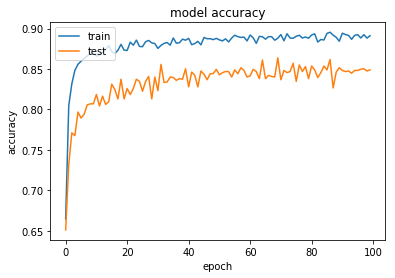

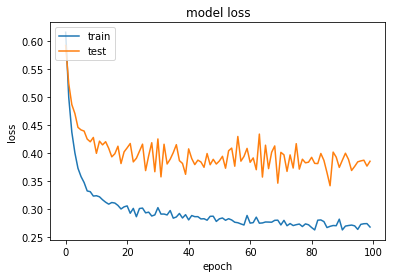

In [4]:
plt.plot(model_history2.history['acc'])
plt.plot(model_history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/home/jovyan/Tests_images/nm-{0}-acc.png'.format(NAME))
## summarize history for loss
plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('/home/jovyan/Tests_images/nm-{0}-loss.png'.format(NAME))

NameError: name 'model' is not defined